In [1]:
import os
os.chdir("..")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utilities.utils import remove_exceptions_from_df, prep_df_for_isolated_analysis

# Introduction
In this file we will be exploring agricultural data provided by Lithuanian National Data Agency.
Main goal of this exploration is to find tendencies amongst Lithuanian beekeepers, we are interested in average beekeeping farm, and profitability. For this purpose we will not be analysing any data that is capped at the maximum.
## Data cleaning
As mentioned previously we want to remove records that do not provide accurate data before we begin analysis. That means that we will be removing  records that are mentioned as the exceptions in the readme file. This choice is made because in this data set there is no reliable way to differentiante between a farm that keeps 100 families of bees and 200. Similar logic applies for other "exceptions" as well.

In [2]:
farm_df = pd.read_csv("data/Lietuvos_Respublikos_2020_metu_visuotinio_zemes_ukio_surasymo_duomenys.csv",index_col="objectid")
farm_df.shape

(132076, 30)

In [3]:
farm_df.drop(["X","Y"],axis = 1,inplace = True)
farm_df = remove_exceptions_from_df(farm_df)
farm_df.shape

(130803, 28)

In [4]:
farm_df = prep_df_for_isolated_analysis(farm_df,'f_2031_k')
farm_df

,f_112_k,f_111_k,f_113_k,f_116_k,f_115_k,u_vld_lytis,u_eko,f_101_k,f_100_k,f_105_k,...,f_1037_k,ukininkavimo_kryptis,f_107_k,ekonominio_dydzio_klase,f_106_k,f_109_k,f_108_k,standartine_produkcija_k,f_2031_k,sal_gyv_k
objectid,,,,,,,,,,,,,,,,,,,,,
24,0,5,0,5,0,1,0,0,5,0,...,0,8,0,2,0,0,0,2500,20,0
153,0,8,0,8,0,1,0,7,1,0,...,0,8,0,1,0,0,0,2000,10,0
154,0,3,0,3,0,1,0,2,1,0,...,0,6,0,1,0,0,0,1500,5,0
191,0,3,0,3,0,2,0,3,0,0,...,0,8,0,1,0,0,0,1000,10,0
260,0,5,0,6,0,2,0,0,5,0,...,0,8,0,2,0,0,0,3500,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131841,0,1,1,2,0,2,0,0,1,0,...,0,8,0,1,0,0,0,1500,10,0
131866,0,0,0,0,0,2,0,0,0,0,...,0,8,0,1,0,0,0,1000,10,0
131872,0,1,0,1,0,2,0,1,0,0,...,0,8,0,1,0,0,0,1500,15,0


In [5]:
farm_df.shape

(4422, 21)

Text(0.5, 47.5815972222222, 'correlations')

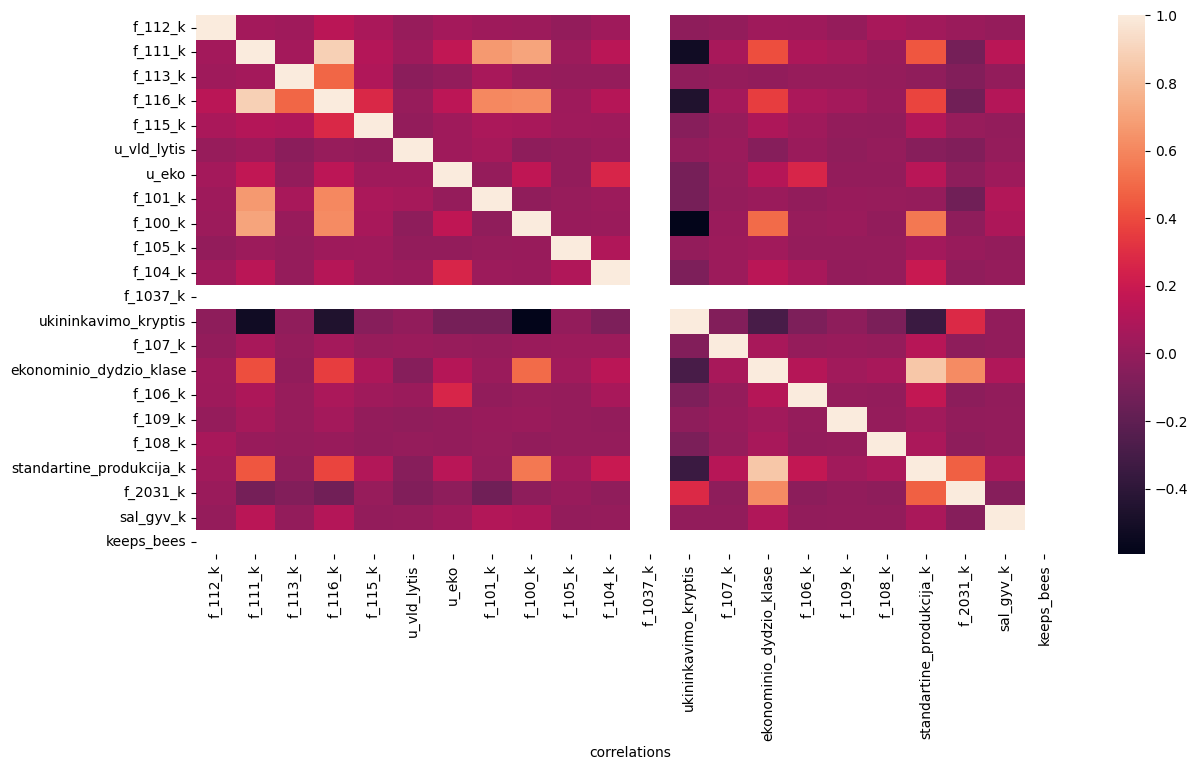

In [16]:
#filtering df to only keep those that actually keep bees and limiting economic class since there are few farms that actually fit the category and it would scew the data
#Also limitig land size since we are interested in smaller farms
df_filtered = farm_df[
    (farm_df['f_116_k'] <= 25) & (farm_df['ekonominio_dydzio_klase'] < 11)]
cor_matrix = df_filtered.corr(numeric_only=True)
plt.figure(figsize=(14,7))
sns.heatmap(data=cor_matrix, annot=False)
plt.xlabel("correlations")

<AxesSubplot: title={'center': 'Distribution of f_2031_k (bee families) by economic size class'}, xlabel='economic size class', ylabel='f_2031_k'>

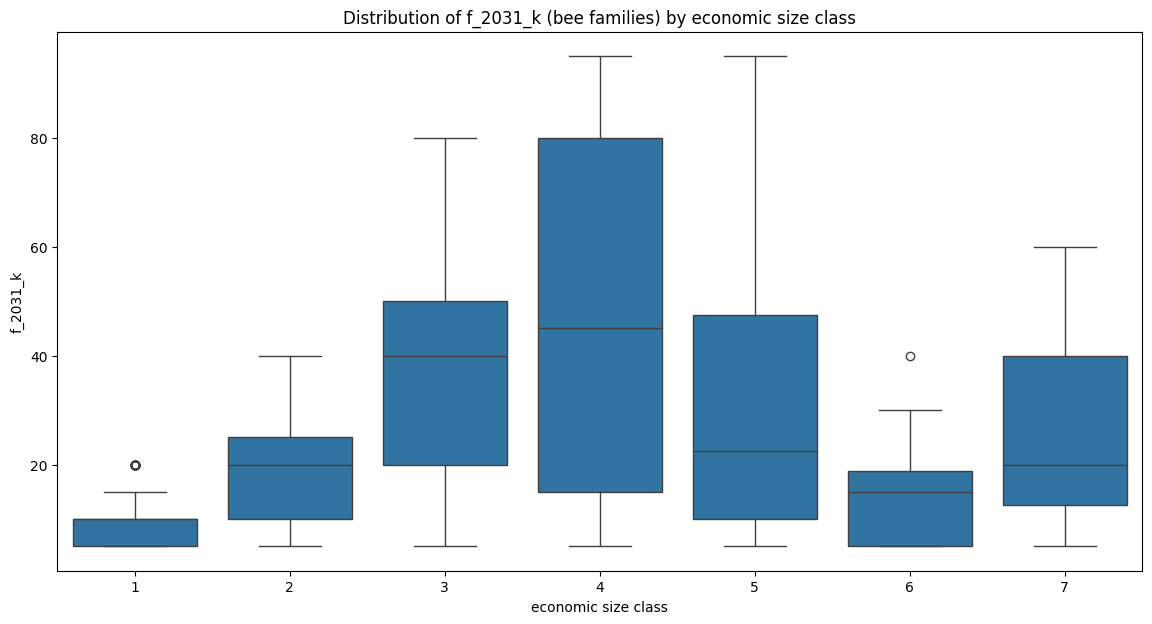

In [15]:
plt.figure(figsize=(14, 7))
plt.title("Distribution of f_2031_k (bee families) by economic size class")
plt.xlabel("economic size class")
sns.boxplot(x='ekonominio_dydzio_klase', y='f_2031_k', data=df_filtered)

At first glance it may look like number of bee families correlate with economic class, up to 5th class, then it drops.
Lets look deeper into economic class distribution amongst beekeeping farms.

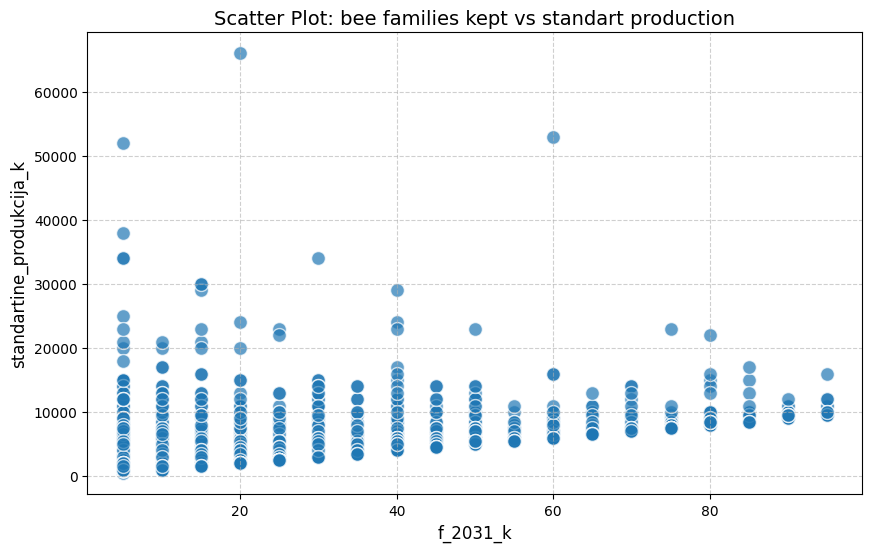

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['f_2031_k'], df_filtered['standartine_produkcija_k'], alpha=0.7, edgecolors='w', s=100)
plt.title(f"Scatter Plot: bee families kept vs standart production", fontsize=14)
plt.ylabel('standartine_produkcija_k', fontsize=12)
plt.xlabel('f_2031_k', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [20]:
df_filtered[(df_filtered['standartine_produkcija_k']>=25000)]

,f_112_k,f_111_k,f_113_k,f_116_k,f_115_k,u_vld_lytis,u_eko,f_101_k,f_100_k,f_105_k,...,ukininkavimo_kryptis,f_107_k,ekonominio_dydzio_klase,f_106_k,f_109_k,f_108_k,standartine_produkcija_k,f_2031_k,sal_gyv_k,keeps_bees
objectid,,,,,,,,,,,,,,,,,,,,,
49248,0,15,0,15,0,2,0,3,5,0,...,6,0,6,2,0,0,30000,15,0,True
68042,0,9,0,9,0,1,0,0,9,0,...,2,0,7,0,0,0,53000,60,0,True
70983,0,13,1,25,10,1,0,2,9,0,...,2,0,7,3,0,0,52000,5,0,True
75969,0,7,0,7,0,1,0,3,2,0,...,2,3,5,0,0,0,25000,5,0,True
87908,0,7,0,8,1,2,0,3,4,0,...,2,0,6,0,0,0,29000,15,0,True
96069,0,8,0,8,0,1,0,0,7,0,...,2,0,6,0,0,0,34000,5,0,True
106346,0,7,2,9,0,1,0,0,7,0,...,2,0,6,0,0,0,38000,5,0,True
112418,0,9,0,9,1,1,0,0,8,0,...,2,0,6,0,0,0,34000,5,0,True
119605,0,17,0,17,0,1,0,1,15,0,...,2,2,7,0,0,0,66000,20,0,True


<AxesSubplot: title={'center': 'Economic stardized production distribution'}, xlabel='Number of bee families', ylabel='standartine_produkcija_k'>

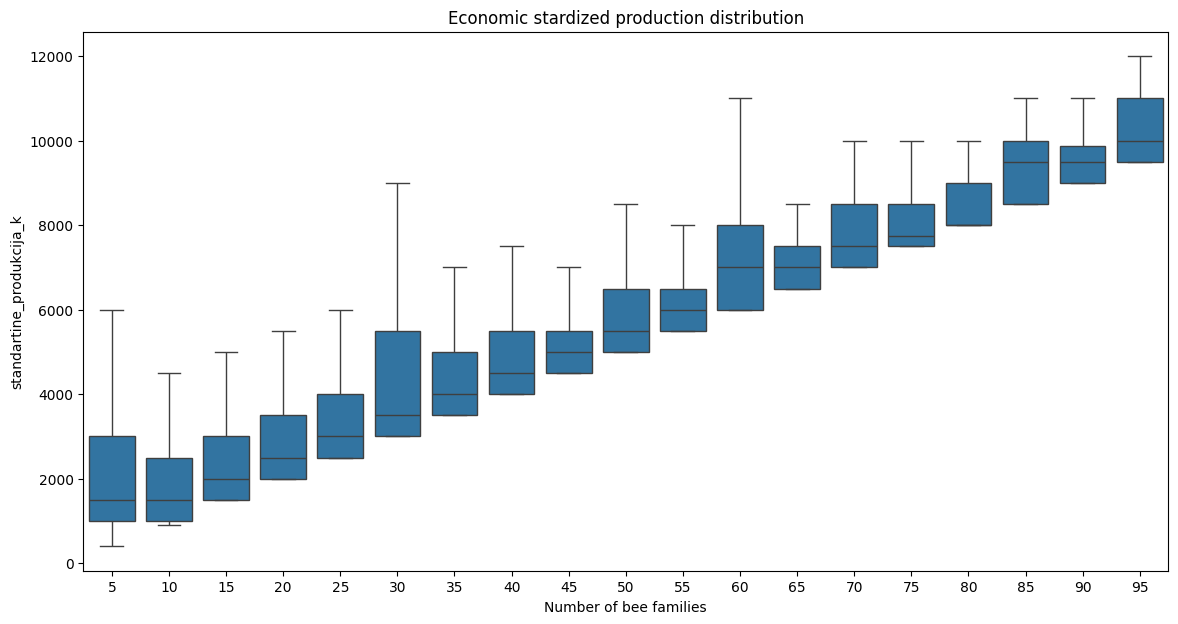

In [24]:
plt.figure(figsize=(14, 7))
plt.title("Economic stardized production distribution")
plt.xlabel("Number of bee families")
sns.boxplot(
    x='f_2031_k',
    y='standartine_produkcija_k',
    showfliers=False,
    data=df_filtered
)